In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
import sys
import numpy as np
import os
import torch
import json

sys.path.append(os.sep.join(os.getcwd().split("/")[:-1] + ["src"]))

In [3]:
from app.dl_model.model.predictor import YoloV5Predictor
from app.dl_model.utils import ImageUtilities
from app.dl_model.image import YoloInput

# Setup Model

In [5]:
YoloV5Predictor.setup_model(
    model_path="/Users/koombea/Desktop/emanuel"
    "/tienda-deep-learning-project/serve/models/224_mvp.pt",
    class_names=["items"],
    anchors = [
        [10,13, 16,30, 33,23], # P3/8
        [30,61, 62,45, 59,119], # P4/16
        [116,90, 156,198, 373,326] # P5/32
    ]
)

# Load Image

The Image will be load as BGR image, then resize, then convert to RGB image

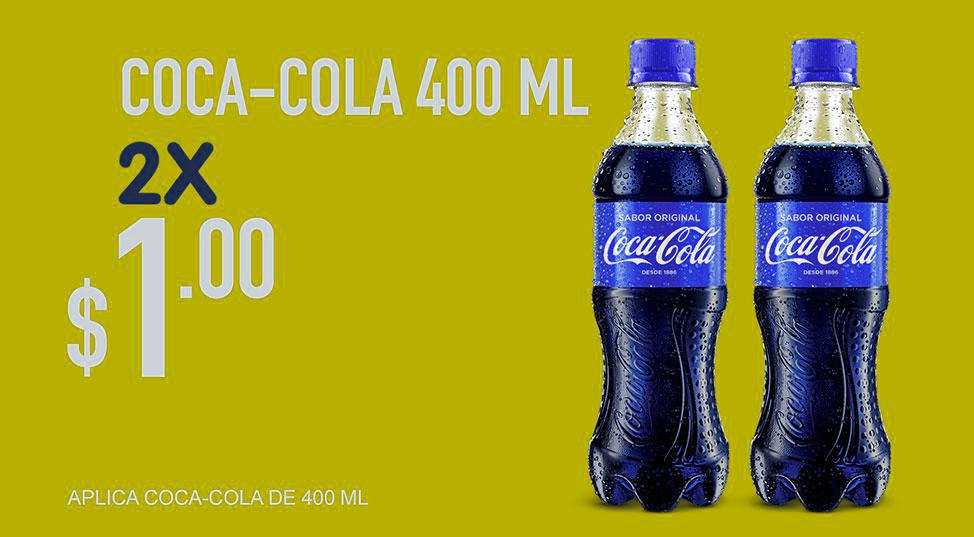

In [6]:
image = ImageUtilities._load_image_from_file('3.jpg')
ImageUtilities._to_pil(image)

## Resize

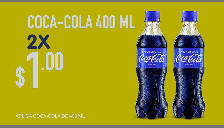

In [7]:
imager = ImageUtilities.rectangular_resize_with_pad(image, new_shape = 224)
ImageUtilities._to_pil(imager)

## BGR to RGB

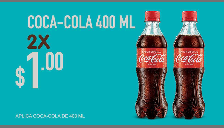

In [8]:
imager = ImageUtilities._transform_image(imager, "RGB")
ImageUtilities._to_pil(imager)

In [9]:
imager_t = ImageUtilities._to_tensor(imager)

In [10]:
model = YoloV5Predictor()

In [11]:
kwargs = {
    "conf_thres" : 0.25,
      "iou_thres" : 0.45,
      "classes" : None,
      "agnostic" : False,
      "multi_label" : False,
      "second_classifier" : False
}

In [12]:
pred = model.predict(imager_t, **kwargs)

In [13]:
print(json.dumps(pred, indent=True))

[
 [
  134.9262237548828,
  9.706722259521484,
  170.31809997558594,
  117.11335754394531,
  0.8907055258750916,
  "items"
 ],
 [
  172.0157470703125,
  8.651458740234375,
  204.93124389648438,
  120.491455078125,
  0.8834130167961121,
  "items"
 ]
]


# Set up Model

In [18]:
YoloV5Predictor.setup_model(
    model_path="/Users/koombea/Desktop/emanuel"
    "/tienda-deep-learning-project/serve/models/224_mvp.pt",
    class_names=["items"],
    anchors = [
        [10,13, 16,30, 33,23], # P3/8
        [30,61, 62,45, 59,119], # P4/16
        [116,90, 156,198, 373,326] # P5/32
    ]
)

# Using YoloInput

In [19]:
yolo_input = YoloInput.from_file(file_path="3.jpg", new_shape=(224, 224))

## Visualize input image

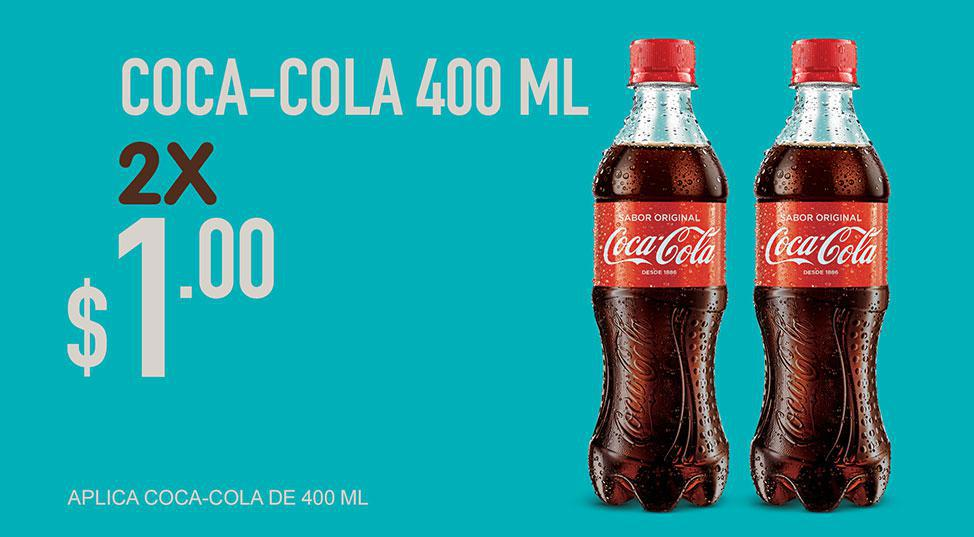

In [20]:
yolo_input.show()

# Detect Products

In [21]:
yolo_input.detect_products()

[[134.9262237548828,
  9.706722259521484,
  170.31809997558594,
  117.11335754394531,
  0.8907055258750916,
  'items'],
 [172.0157470703125,
  8.651458740234375,
  204.93124389648438,
  120.491455078125,
  0.8834130167961121,
  'items']]